<a href="https://colab.research.google.com/github/NETTHINKERS/RSI-SENTIMENT-ANALYSIS/blob/gh-pages/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: Using the relative strenght index (RSI) and Python to determine if the security of any stock or price is overbought or over sold

In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
#load data
from google.colab import files
uploaded = files.upload()

Saving GBPUSD=X.csv to GBPUSD=X (2).csv


In [10]:
#store data
GBPUSD = pd.read_csv('GBPUSD=X.csv')
#show data
GBPUSD

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,1.298771,1.301897,1.295673,1.298819,1.298819,0
1,2020-01-15,1.302253,1.304121,1.298921,1.302253,1.302253,0
2,2020-01-16,1.304121,1.308164,1.302898,1.304121,1.304121,0
3,2020-01-17,1.307788,1.311579,1.301778,1.307873,1.307873,0
4,2020-01-20,1.300712,1.300965,1.296479,1.300728,1.300728,0
...,...,...,...,...,...,...,...
258,2021-01-08,1.356815,1.363178,1.354041,1.356963,1.356963,0
259,2021-01-11,1.352100,1.352979,1.345424,1.351625,1.351625,0
260,2021-01-12,1.352576,1.363568,1.350767,1.352411,1.352411,0
261,2021-01-13,1.366890,1.369994,1.362249,1.367054,1.367054,0


In [11]:
#set date as index for data
GBPUSD = GBPUSD.set_index(pd.DatetimeIndex(GBPUSD['Date'].values))
GBPUSD

,Date,Open,High,Low,Close,Adj Close,Volume
2020-01-14,2020-01-14,1.298771,1.301897,1.295673,1.298819,1.298819,0
2020-01-15,2020-01-15,1.302253,1.304121,1.298921,1.302253,1.302253,0
2020-01-16,2020-01-16,1.304121,1.308164,1.302898,1.304121,1.304121,0
2020-01-17,2020-01-17,1.307788,1.311579,1.301778,1.307873,1.307873,0
2020-01-20,2020-01-20,1.300712,1.300965,1.296479,1.300728,1.300728,0
...,...,...,...,...,...,...,...
2021-01-08,2021-01-08,1.356815,1.363178,1.354041,1.356963,1.356963,0
2021-01-11,2021-01-11,1.352100,1.352979,1.345424,1.351625,1.351625,0
2021-01-12,2021-01-12,1.352576,1.363568,1.350767,1.352411,1.352411,0
2021-01-13,2021-01-13,1.366890,1.369994,1.362249,1.367054,1.367054,0


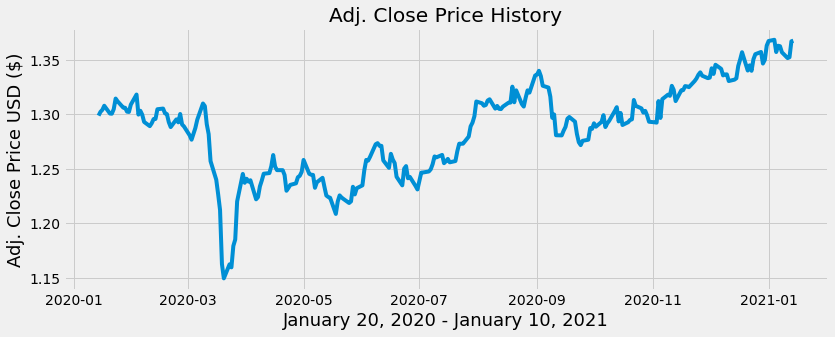

In [18]:
#Visual price
plt.figure(figsize=(12.2, 4.5))
plt.plot(GBPUSD.index, GBPUSD['Adj Close'], label = 'Adj Close Price')
plt.title('Adj. Close Price History')
plt.xlabel('January 20, 2020 - January 10, 2021', fontsize = 18)
plt.ylabel('Adj. Close Price USD ($)', fontsize = 18)
plt.show()

In [22]:
 #calculate the RSI

 #difference in price from previous day
 delta = GBPUSD['Adj Close'].diff(1)
 delta

2020-01-14         NaN
2020-01-15    0.003434
2020-01-16    0.001868
2020-01-17    0.003752
2020-01-20   -0.007145
                ...   
2021-01-08   -0.005565
2021-01-11   -0.005338
2021-01-12    0.000786
2021-01-13    0.014643
2021-01-14    0.000561
Name: Adj Close, Length: 263, dtype: float64

In [23]:
#get rid of NaN
delta = delta.dropna()
delta

2020-01-15    0.003434
2020-01-16    0.001868
2020-01-17    0.003752
2020-01-20   -0.007145
2020-01-21   -0.000169
                ...   
2021-01-08   -0.005565
2021-01-11   -0.005338
2021-01-12    0.000786
2021-01-13    0.014643
2021-01-14    0.000561
Name: Adj Close, Length: 262, dtype: float64

In [24]:
#get positive gain (up) and negative gain (down)
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0

In [35]:
#get time period
period = 50

#calculate average gain and loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [36]:
#calculate the RSI

#calculate the Relative Strength (RS)
RS = AVG_Gain / AVG_Loss
#calculate the Relative Strength Index (RSI)
RSI = 100.0 - (100.0 / (1.0 + RS))

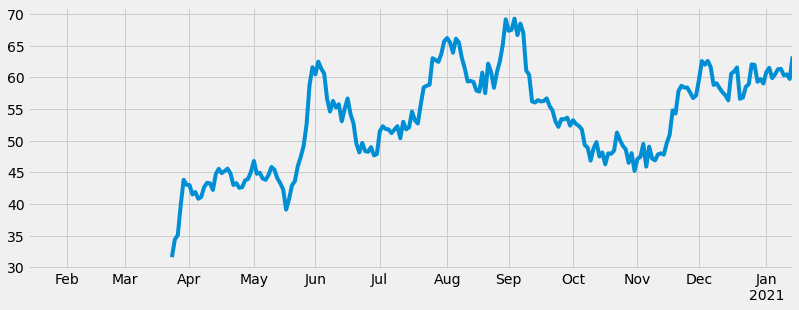

In [37]:
#show RSI visually
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [40]:
#new data frame
new_df = pd.DataFrame()
new_df['Adj Close'] = GBPUSD['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close,RSI
2020-01-14,1.298819,NaN
2020-01-15,1.302253,NaN
2020-01-16,1.304121,NaN
2020-01-17,1.307873,NaN
2020-01-20,1.300728,NaN
...,...,...
2021-01-08,1.356963,61.355300
2021-01-11,1.351625,60.320083
2021-01-12,1.352411,60.488964
2021-01-13,1.367054,59.767460


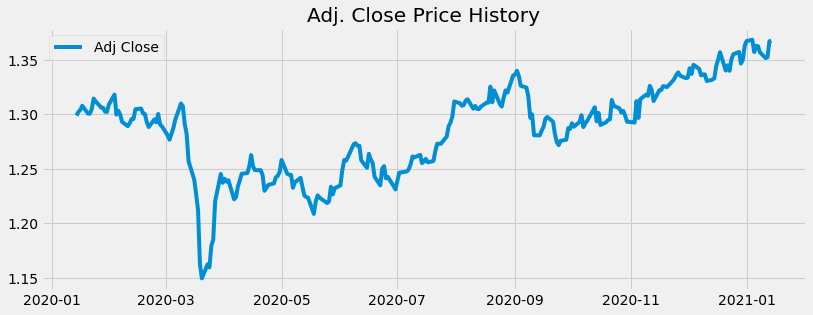

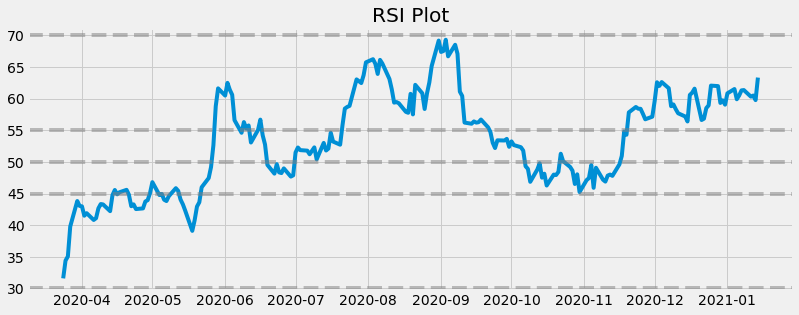

In [44]:
#visual show adjusted close price and RSI
#plot adjusted close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj. Close Price History')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

#plot RSI values and levels
plt.figure(figsize=(12.2, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(70, linestyle='--', alpha = 0.5, color='gray')
plt.axhline(55, linestyle='--', alpha = 0.5, color='gray')
plt.axhline(50, linestyle='--', alpha = 0.5, color='gray')
plt.axhline(45, linestyle='--', alpha = 0.5, color='gray')
plt.axhline(30, linestyle='--', alpha = 0.5, color='gray')
plt.show()